# Principal Component Analysis

## import library

In [2422]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2423]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

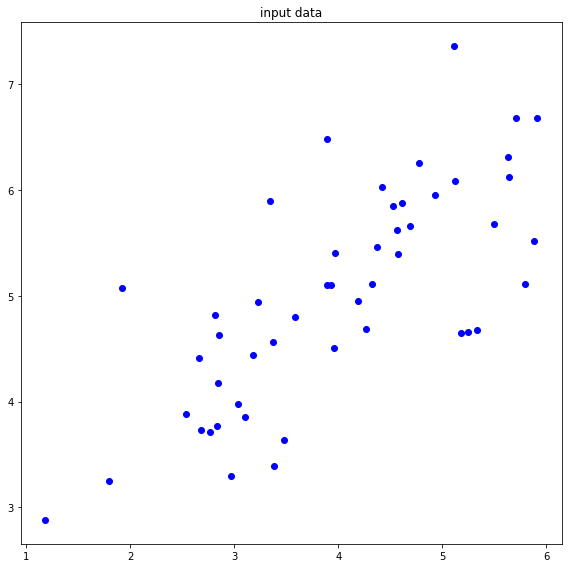

In [2424]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [2425]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    feature_normalize = feature - np.mean(feature , axis = 0)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [2426]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [2427]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    std=np.std(feature0, axis = 0)
    feature=feature/std
    Sigma=(np.matmul(feature.T,feature))/(number_data-1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [2428]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    cov_mat=compute_covariance(feature)
    global eig_vals,eig_vecs

    def sorted_eig(A):
        lambdas, vs = np.linalg.eig(A)
        lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)),key=lambda x: x[0], reverse=True))
        return lambdas, np.array(vs).T  

    eig_vals,eig_vecs=sorted_eig(cov_mat)

    principal_component_1T=[]
    principal_component_1T.append(eig_vals[0])
    principal_component_1T.append(eig_vecs[0])
    principal_component_1T=np.array(principal_component_1T)    
    
    principal_component_2T=[]
    principal_component_2T.append(eig_vals[1])
    principal_component_2T.append(eig_vecs[1])
    principal_component_2T=np.array(principal_component_2T)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1T, principal_component_2T)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [2429]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    projection=np.matmul(feature,vector)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [2430]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)
projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [2431]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [2432]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:, 0],feature[:, 1])
    plt.arrow(x=0, y=0, dx=eig_vecs[0][0], dy=eig_vecs[0][1], width=.05, facecolor='red',edgecolor='none')
    plt.arrow(x=0, y=0, dx=eig_vecs[1][1], dy=eig_vecs[1][0], width=.05,facecolor='green',edgecolor='none')



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [2433]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    line = np.linspace(min_x, max_x, 1000)
    plt.scatter(feature[:, 0],feature[:, 1])
    plt.plot(line, eig_vecs[0][1]/eig_vecs[0][0] * line , linestyle='solid', label='First eigenvector',color='red')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [2434]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    line = np.linspace(min_x, max_x, 1000)
    plt.scatter(feature[:, 0],feature[:, 1])
    plt.plot(line, eig_vecs[1][1]/eig_vecs[1][0] * line , linestyle='solid', label='Second eigenvector',color='red')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [2435]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    line = np.linspace(min_x, max_x, 1000)
    plt.scatter(feature[:, 0],feature[:, 1])
    plt.plot(line, eig_vecs[0][1]/eig_vecs[0][0] * line , linestyle='solid', label='First eigenvector',color='red')
    projection1 = compute_projection_onto_line(feature, principal_component_1)
    projection1x=[]
    projection1y=[]
    for i in projection1:
        projection1x.append(i[0])
        projection1y.append(i[1])

    plt.scatter(projection1x,projection1y,facecolor='green')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [2436]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    line = np.linspace(min_x, max_x, 1000)
    plt.scatter(feature[:, 0],feature[:, 1])
    plt.plot(line, eig_vecs[1][1]/eig_vecs[1][0] * line , linestyle='solid',color='red')
    projection2 = compute_projection_onto_line(feature, principal_component_2)
    projection2x=[]
    projection2y=[]
    for i in projection2:
        projection2x.append(i[0])
        projection2y.append(i[1])

    plt.scatter(projection2x,projection2y,facecolor='green')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [2437]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    line = np.linspace(min_x, max_x, 1000)
    plt.scatter(feature[:, 0],feature[:, 1],color='b')
    plt.plot(line, eig_vecs[0][1]/eig_vecs[0][0] * line , linestyle='solid',color='red')
    projection1 = compute_projection_onto_line(feature, principal_component_1)
    projection1x=[]
    projection1y=[]
    projection1xy=[]
    
    for i in projection1:
        projection1x.append(i[0])
        projection1y.append(i[1])
    plt.scatter(projection1x,projection1y,color='g')
    featurex=[]
    featurey=[]
    for i in feature:
        featurex.append(i[0])
        featurey.append(i[1])
    plt.plot((featurex,projection1x),(featurey,projection1y),color='grey',linestyle = 'dotted')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 5, max_x + 5)
    plt.ylim(min_y - 5, max_y + 5)

    plt.tight_layout()
    plt.show()

In [2438]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    line = np.linspace(min_x, max_x, 1000)
    plt.scatter(feature[:, 0],feature[:, 1],color='b')
    plt.plot(line, eig_vecs[1][1]/eig_vecs[1][0] * line , linestyle='solid',color='red')
    projection2 = compute_projection_onto_line(feature, principal_component_2)
    projection2x=[]
    projection2y=[]
    projection2xy=[]
    for i in projection2:
        projection2x.append(i[0])
        projection2y.append(i[1])
    plt.scatter(projection2x,projection2y,color='g')
    featurex=[]
    featurey=[]
    featurexy=[]
    for i in feature:
        featurex.append(i[0])
        featurey.append(i[1])
    plt.plot((featurex,projection2x),(featurey,projection2y),color='grey',linestyle = 'dotted')
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


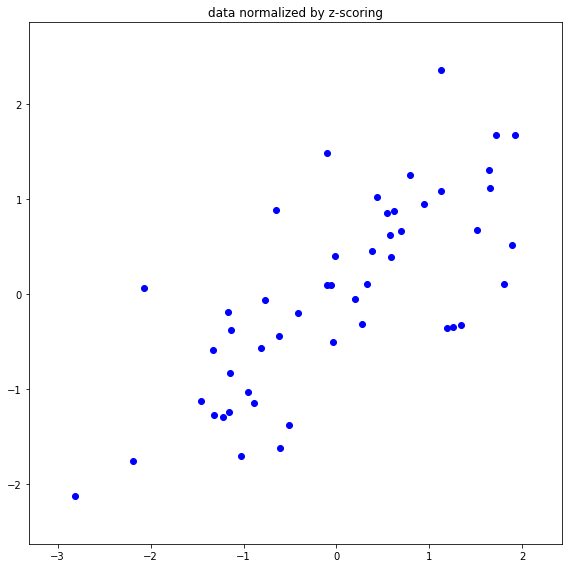

**************************************************
## [RESULT 02]
**************************************************


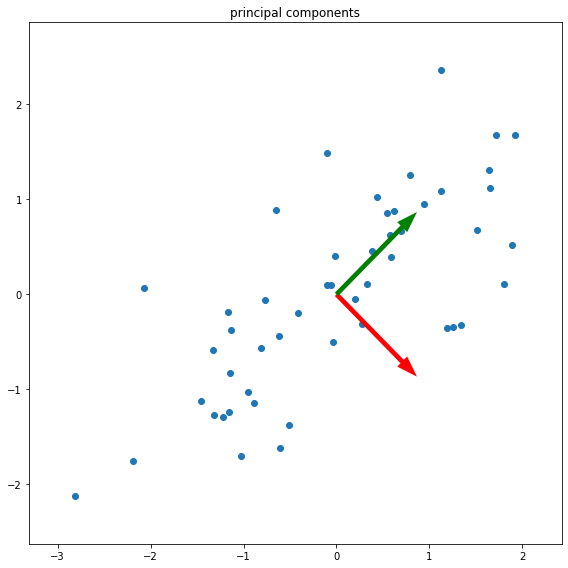

**************************************************
## [RESULT 03]
**************************************************


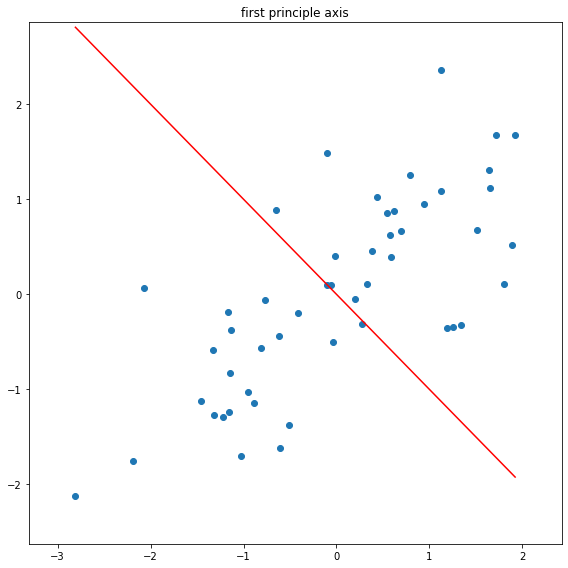

**************************************************
## [RESULT 04]
**************************************************


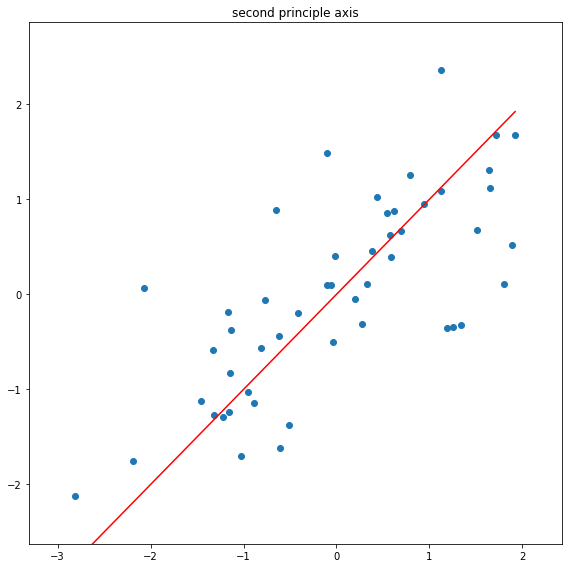

**************************************************
## [RESULT 05]
**************************************************


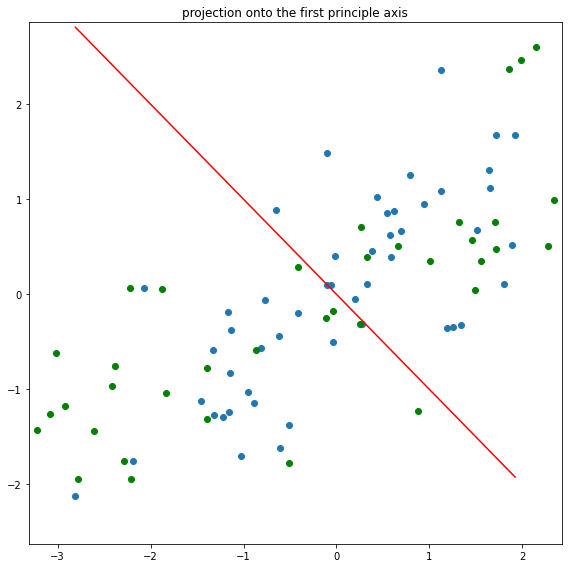

**************************************************
## [RESULT 06]
**************************************************


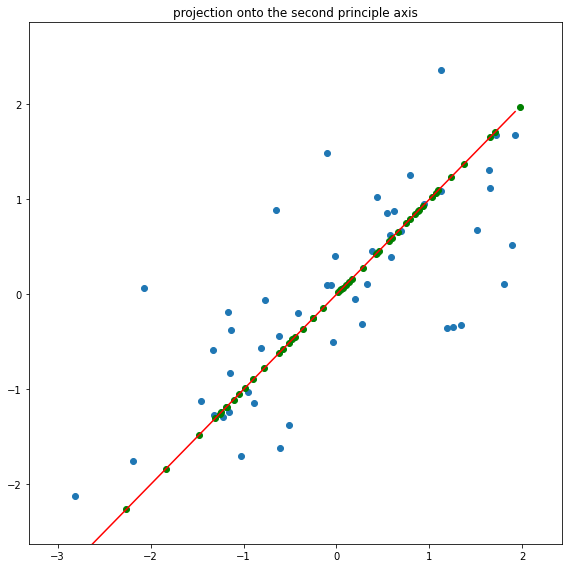

**************************************************
## [RESULT 07]
**************************************************


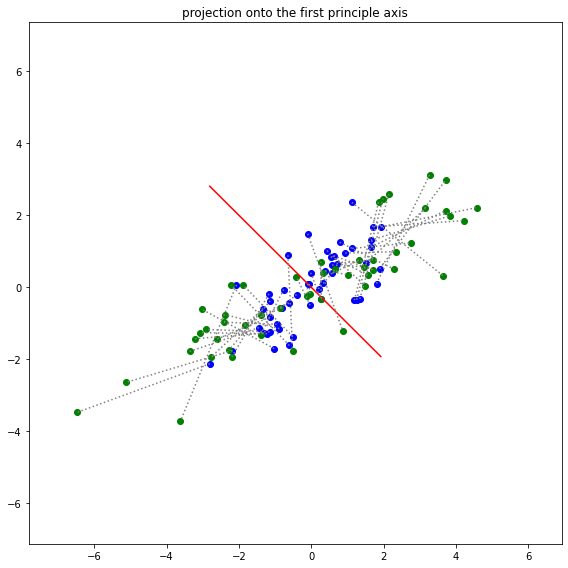

**************************************************
## [RESULT 08]
**************************************************


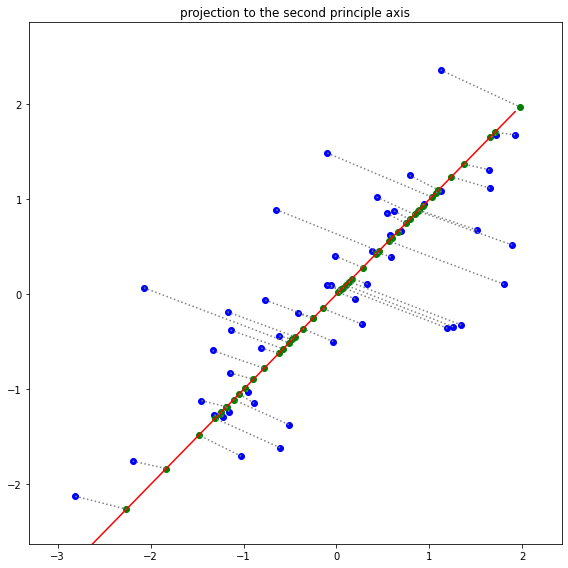

In [2439]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)